In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

z = pd.read_csv('house_price.txt', sep = ',')

In [7]:
z.loc[:, ("y1")] = (z['price'] > z['price'].median()).astype(int)
z = z.drop(['index','price','sq_price'], axis = 1)
z_low = z.loc[z['y1'] == 0][['area','bathrooms','y1']]
z_high = z.loc[z['y1'] == 1][['area','bathrooms','y1']]

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
trainX, testX, trainY, testY = train_test_split(z[['area','bathrooms']], z['y1'], test_size = 0.25, random_state = 33)
ss = StandardScaler()
trainX_std = ss.fit_transform(trainX)
testX_std = ss.transform(testX)

In [17]:
## Bagging
from sklearn.ensemble import BaggingClassifier as bc
bg = bc().fit(trainX_std,trainY)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
predictY_bg = bg.predict(testX_std)
CFmat = confusion_matrix(y_true = testY, y_pred = predictY_bg)
print(CFmat)
print(classification_report(testY, predictY_bg))

[[6 1]
 [1 4]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.80      0.80      0.80         5

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



In [21]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier().fit(trainX_std, trainY)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
predictY_rf = rforest.predict(testX_std)
CFmat = confusion_matrix(y_true = testY, y_pred = predictY_rf)
print(CFmat)
print(classification_report(testY, predictY_rf))

[[7 0]
 [2 3]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.60      0.75         5

    accuracy                           0.83        12
   macro avg       0.89      0.80      0.81        12
weighted avg       0.87      0.83      0.82        12



In [27]:
## check the mean of Rf and Dt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
al_RF = []
al_DT = []

for i in range(1000):
    trainX, testX, trainY, testY = train_test_split(z[['area','bathrooms']], z['y1'], test_size = 0.25)
    ss = StandardScaler()
    trainX_std = ss.fit_transform(trainX)
    testX_std = ss.transform(testX)

    rforest = RandomForestClassifier().fit(trainX_std,trainY)
    accuracy_RF = rforest.score(testX_std, testY)
    al_RF.append(accuracy_RF)
    
    dtree = DecisionTreeClassifier().fit(trainX_std,trainY)
    accuracy_DT = dtree.score(testX_std, testY)
    al_DT.append(accuracy_DT)

print('mean of RF :',np.mean(al_RF))
print('mean of DT :',np.mean(al_DT))

mean of RF : 0.6981666666666666
mean of DT : 0.68575


In [41]:
## AdaBoost (Adaptive Boosting)
from sklearn.ensemble import AdaBoostClassifier
adaB = AdaBoostClassifier(n_estimators = 6).fit(trainX_std,trainY)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
predictY_adaB = adaB.predict(testX_std)
CFmat = confusion_matrix(y_true = testY, y_pred = predictY_adaB)
print(CFmat)
print(classification_report(testY, predictY_adaB))

[[6 1]
 [1 4]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.80      0.80      0.80         5

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



In [46]:
adaB.feature_importances_

array([1., 0.])

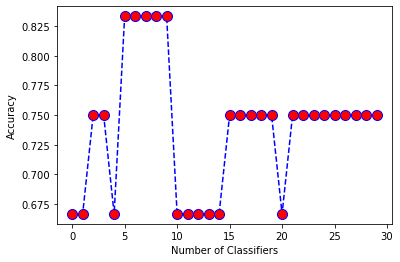

In [40]:
## find the best number of classifiers
import matplotlib.pyplot as plt
accuracy = []
for i in range(1,31):
    adaB = AdaBoostClassifier(n_estimators = i).fit(trainX_std,trainY)
    accuracy.append(adaB.score(testX_std, testY))

plt.ylabel('Accuracy')
plt.xlabel('Number of Classifiers')
plt.plot(accuracy, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)

In [47]:
## GBT (Gradient Boosting Tree)
from sklearn.ensemble import GradientBoostingClassifier
gBoosting = GradientBoostingClassifier().fit(trainX_std,trainY)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
predictY_gbt = adaB.predict(testX_std)
CFmat = confusion_matrix(y_true = testY, y_pred = predictY_gbt)
print(CFmat)
print(classification_report(testY, predictY_gbt))

[[6 1]
 [1 4]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.80      0.80      0.80         5

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



In [49]:
## voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

al_RF = []
al_DF = []
al_all = []
for i in range(1000):
    trainX, testX, trainY, testY = train_test_split(z[['area','bathrooms']], z['y1'], test_size = 0.25)
    ss = StandardScaler()
    trainX_std = ss.fit_transform(trainX)
    testX_std = ss.transform(testX)

    rforest = RandomForestClassifier().fit(trainX_std,trainY)
    accuracy_RF = rforest.score(testX_std, testY)
    al_RF.append(accuracy_RF)
    
    dtree = DecisionTreeClassifier().fit(trainX_std,trainY)
    accuracy_DT = dtree.score(testX_std, testY)
    al_DT.append(accuracy_DT)
    
    em_all = VotingClassifier([('logR', LogisticRegression()),
                               ('svm',LinearSVC()),
                               ('RF',RandomForestClassifier())]).fit(trainX_std,trainY)
    accuracy_em_all = em_all.score(testX_std,testY)
    al_all.append(accuracy_em_all)

print('mean of RF :',np.mean(al_RF))
print('mean of DT :',np.mean(al_DT))
print('mean of em_all :',np.mean(al_all))

mean of RF : 0.70225
mean of DT : 0.6840833333333333
mean of em_all : 0.78225


In [51]:
voting_em = VotingClassifier([('logR', LogisticRegression()),
                               ('svm',LinearSVC()),
                               ('RF',RandomForestClassifier())]).fit(trainX_std,trainY)


In [52]:
from sklearn.metrics import classification_report,confusion_matrix
predictY_voting_em = voting_em.predict(testX_std)
CFmat = confusion_matrix(y_true = testY, y_pred = predictY_voting_em)
print(CFmat)
print(classification_report(testY, predictY_voting_em))

[[7 0]
 [1 4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12

